# Telco Churn Analysis

**Dataset Info:**
Sample Data Set containing Telco customer data and showing customers left last month

In [2]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from sklearn import preprocessing
from src.logger import logging
%matplotlib inline

**Load the data file **

In [4]:
telco_base_data = pd.read_csv('notebook\data\Telco_Customer_Churn_RAW.csv')
logging.info("Data read from 'Telco_Customer_Churn_RAW.csv'")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Admin\AppData\Local\Temp\ipykernel_14368\3724508244.py:1: SyntaxWarning: invalid escape sequence '\d'
  telco_base_data = pd.read_csv('notebook\data\Telco_Customer_Churn_RAW.csv')
C:\Users\Admin\AppData\Local\Temp\ipykernel_14368\3724508244.py:1: SyntaxWarning: invalid escape sequence '\d'
  telco_base_data = pd.read_csv('notebook\data\Telco_Customer_Churn_RAW.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'notebook\\data\\Telco_Customer_Churn_RAW.csv'

Look at the top 5 records of data

In [284]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [285]:
telco_base_data.shape

(7043, 21)

In [286]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [287]:
# Checking the data types of all the columns
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [288]:
# Check the descriptive statistics of numeric variables
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

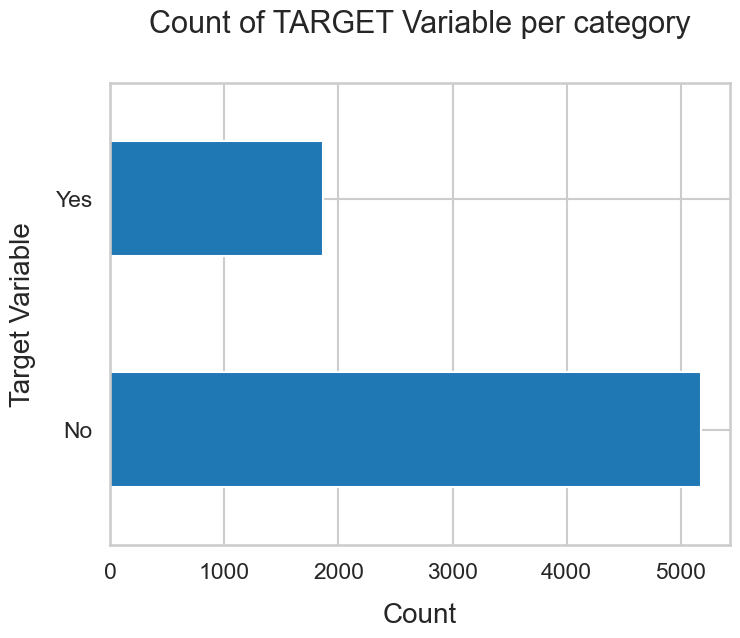

In [289]:
telco_base_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [290]:
yes ,no = 100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])
logging.info(f"Churn Yes:No Percentage:{yes}%:{no}%")
print(f"Churn\nYes:{yes}%\nNo:{no}%")

Churn
Yes:73.46301292063042%
No:26.536987079369588%


In [291]:
yes , no = telco_base_data['Churn'].value_counts()
logging.info(f"Churn Yes:No counts: Yes-{yes}:No-{no}")
print(f"Churn\nYes:{yes}\nNo:{no}")

Churn
Yes:5174
No:1869


* Data is highly imbalanced, ratio = 73:27<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

In [292]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
telco_base_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [293]:
missing = pd.DataFrame((telco_base_data.isnull().sum())*100/telco_base_data.shape[0]).reset_index()
print(missing)
logging.info(f"Missing values:\n{missing}")

               index    0
0         customerID  0.0
1             gender  0.0
2      SeniorCitizen  0.0
3            Partner  0.0
4         Dependents  0.0
5             tenure  0.0
6       PhoneService  0.0
7      MultipleLines  0.0
8    InternetService  0.0
9     OnlineSecurity  0.0
10      OnlineBackup  0.0
11  DeviceProtection  0.0
12       TechSupport  0.0
13       StreamingTV  0.0
14   StreamingMovies  0.0
15          Contract  0.0
16  PaperlessBilling  0.0
17     PaymentMethod  0.0
18    MonthlyCharges  0.0
19      TotalCharges  0.0
20             Churn  0.0


### Missing Data - Initial Intuition

* Here, we don't have any missing data.

General Thumb Rules:

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.

## Data Cleaning


**1.** Create a copy of base data for manupulation & processing

In [294]:
telco_data = telco_base_data.copy()

**2.** Total Charges should be numeric amount. Let's convert it to numerical data type

In [295]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**3.** As we can see there are 11 missing values in TotalCharges column. Let's check these records

In [296]:
telco_data.loc[telco_data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**4. Missing Value Treatement**

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [297]:
#Removing missing values
telco_data.dropna(how = 'any', inplace = True)
logging.info("Missing Value Treatement completed")

**5.** Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [298]:
# Get the max tenure
print(telco_data['tenure'].max()) #72

72


In [299]:
# Group the tenure in bins of 12 months
labels = ["{0}_{1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [300]:
telco_data['tenure_group'].value_counts()

tenure_group
1_12     2175
61_72    1407
13_24    1024
25_36     832
49_60     832
37_48     762
Name: count, dtype: int64

**6.** Remove columns not required for processing

In [301]:
#drop column customerID and tenure
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()
logging.info("Dropping unnescessary columns")

## Data Exploration
**1.** Plot distibution of individual predictors by churn

### Univariate Analysis

In [ ]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

**2.** Convert the target variable 'Churn'  in a binary numeric variable i.e. Yes=1 ; No = 0

In [303]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [304]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   PhoneService      7032 non-null   object  
 5   MultipleLines     7032 non-null   object  
 6   InternetService   7032 non-null   object  
 7   OnlineSecurity    7032 non-null   object  
 8   OnlineBackup      7032 non-null   object  
 9   DeviceProtection  7032 non-null   object  
 10  TechSupport       7032 non-null   object  
 11  StreamingTV       7032 non-null   object  
 12  StreamingMovies   7032 non-null   object  
 13  Contract          7032 non-null   object  
 14  PaperlessBilling  7032 non-null   object  
 15  PaymentMethod     7032 non-null   object  
 16  MonthlyCharges    7032 non-nu

**3.** Convert all the categorical variables into dummy variables

In [305]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
test_lab = telco_data.copy()
extra = []
extra =  pd.DataFrame(test_lab['tenure_group'])
extra['tenure_group']  =  label_encoder.fit_transform(extra['tenure_group'])

test_lab = test_lab.drop('tenure_group',axis =1)

np.where(test_lab.Churn == 'Yes',1,0)
for column in test_lab.columns:
    if test_lab[column].dtype == 'object':
        test_lab[column] = label_encoder.fit_transform(test_lab[column])

test_lab = pd.concat([test_lab,extra],axis=1)

In [306]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1_12,tenure_group_13_24,tenure_group_25_36,tenure_group_37_48,tenure_group_49_60,tenure_group_61_72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


**4.** Relationship between Monthly Charges and Total Charges

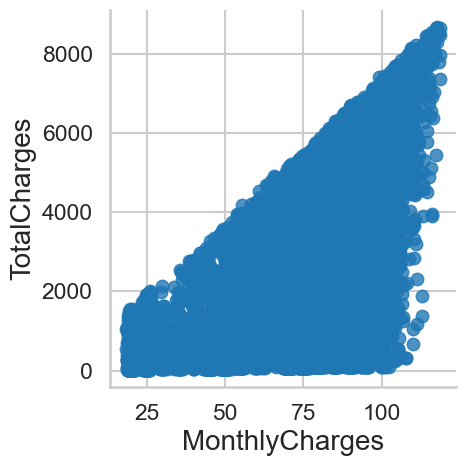

In [307]:
sns.lmplot(data=test_lab, x='MonthlyCharges', y='TotalCharges', fit_reg=False,)

Total Charges increase as Monthly Charges increase - as expected.

**5.** Churn by Monthly Charges and Total Charges

C:\Users\Admin\AppData\Local\Temp\ipykernel_460\2777923844.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(test_lab.MonthlyCharges[(test_lab["Churn"] == 0) ],
C:\Users\Admin\AppData\Local\Temp\ipykernel_460\2777923844.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(test_lab.MonthlyCharges[(test_lab["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

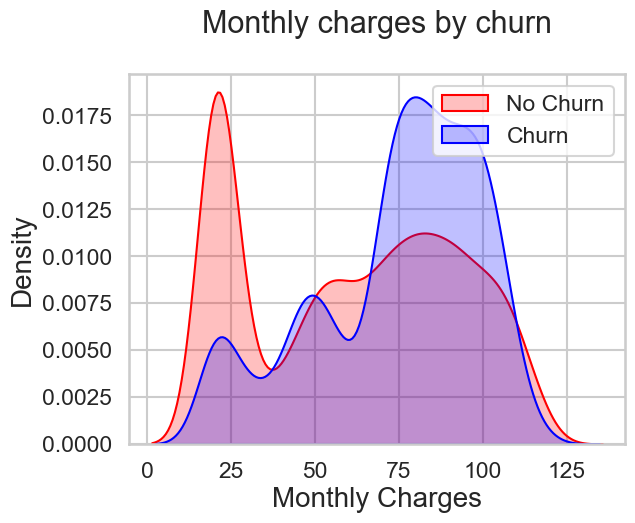

In [308]:
Mth = sns.kdeplot(test_lab.MonthlyCharges[(test_lab["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(test_lab.MonthlyCharges[(test_lab["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

**Insight:** Churn is high when Monthly Charges ar high

C:\Users\Admin\AppData\Local\Temp\ipykernel_460\868699247.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(test_lab.TotalCharges[(test_lab["Churn"] == 0) ],
C:\Users\Admin\AppData\Local\Temp\ipykernel_460\868699247.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(test_lab.TotalCharges[(test_lab["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

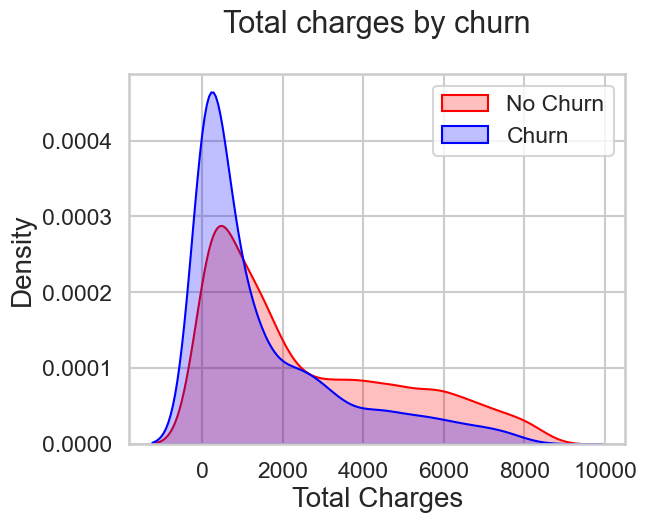

In [309]:
Tot = sns.kdeplot(test_lab.TotalCharges[(test_lab["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(test_lab.TotalCharges[(test_lab["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

**Surprising insight** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are linkd to **High Churn**.

**11. Build a corelation of all predictors with 'Churn' **

<Axes: >

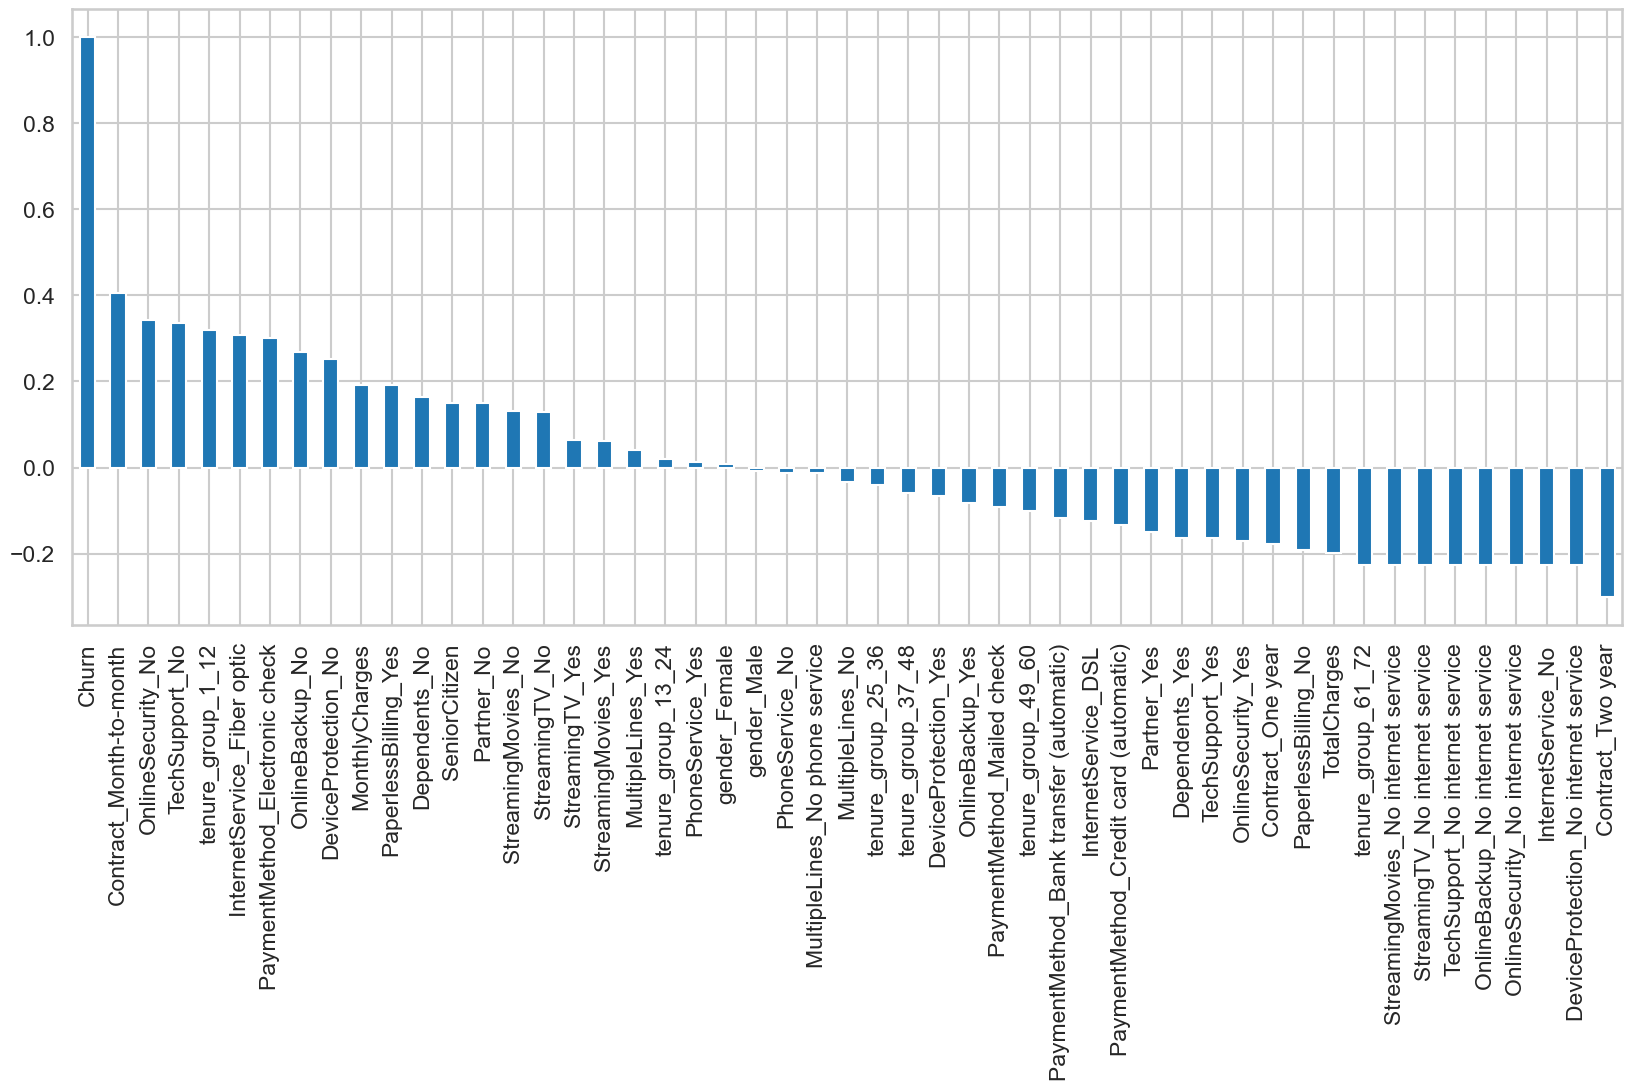

In [310]:
telco_data_dummies = pd.get_dummies(telco_data)
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

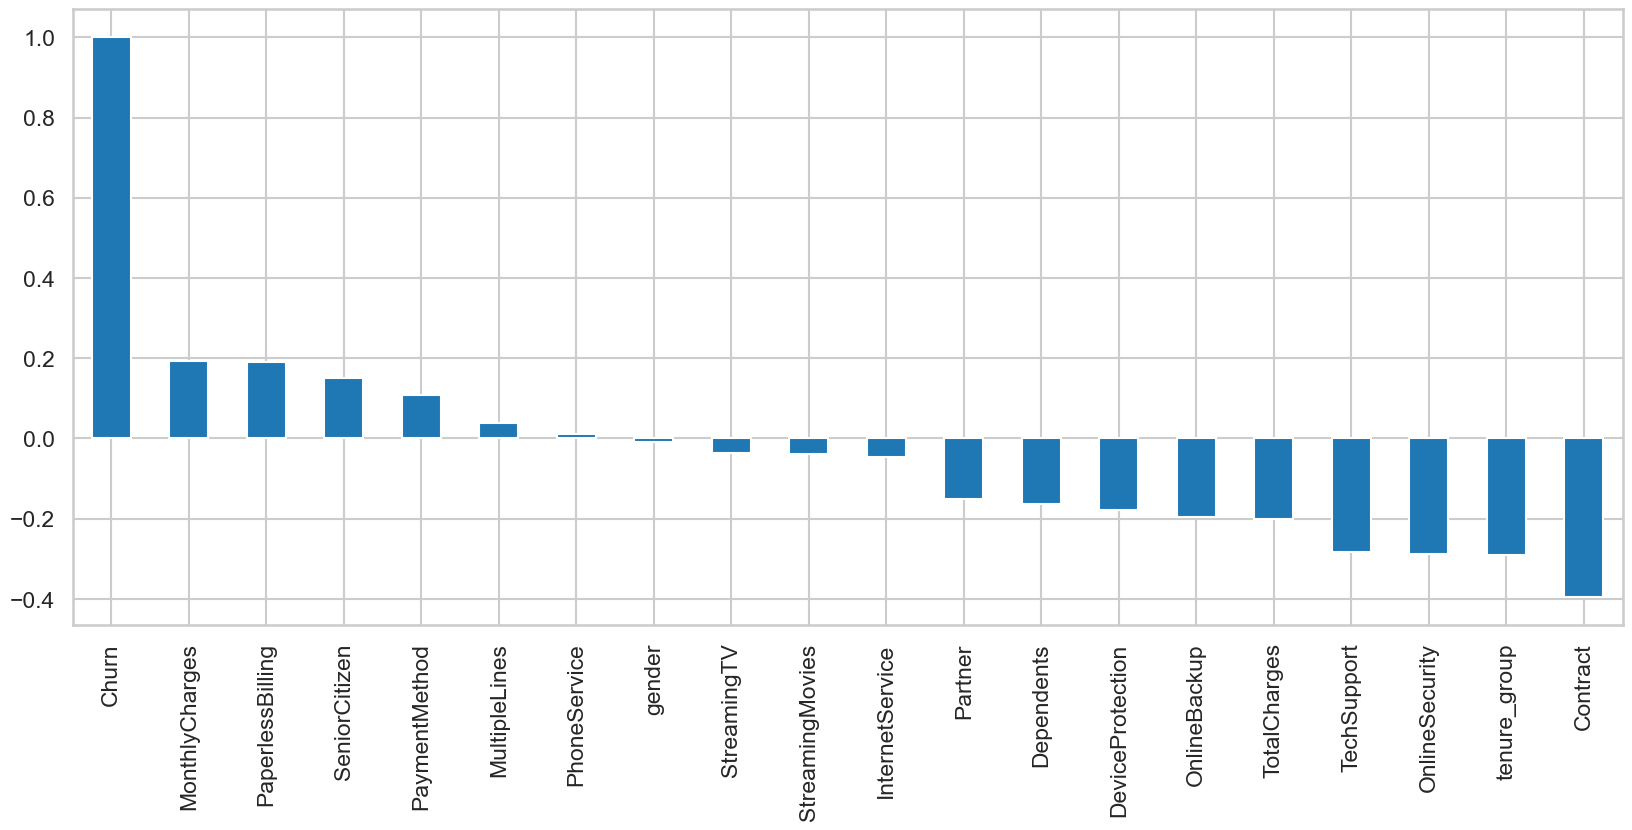

In [311]:
plt.figure(figsize=(20,8))
test_lab.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight:**

**HIGH** Churn seen in case of  **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seens in case of **Long term contracts**, **Subscriptions without internet service** and **The customers engaged for 5+ years**

Factors like **Gender**, **Availability of PhoneService** and **# of multiple lines** have alomost **NO** impact on Churn

This is also evident from the **Heatmap** below

<Axes: >

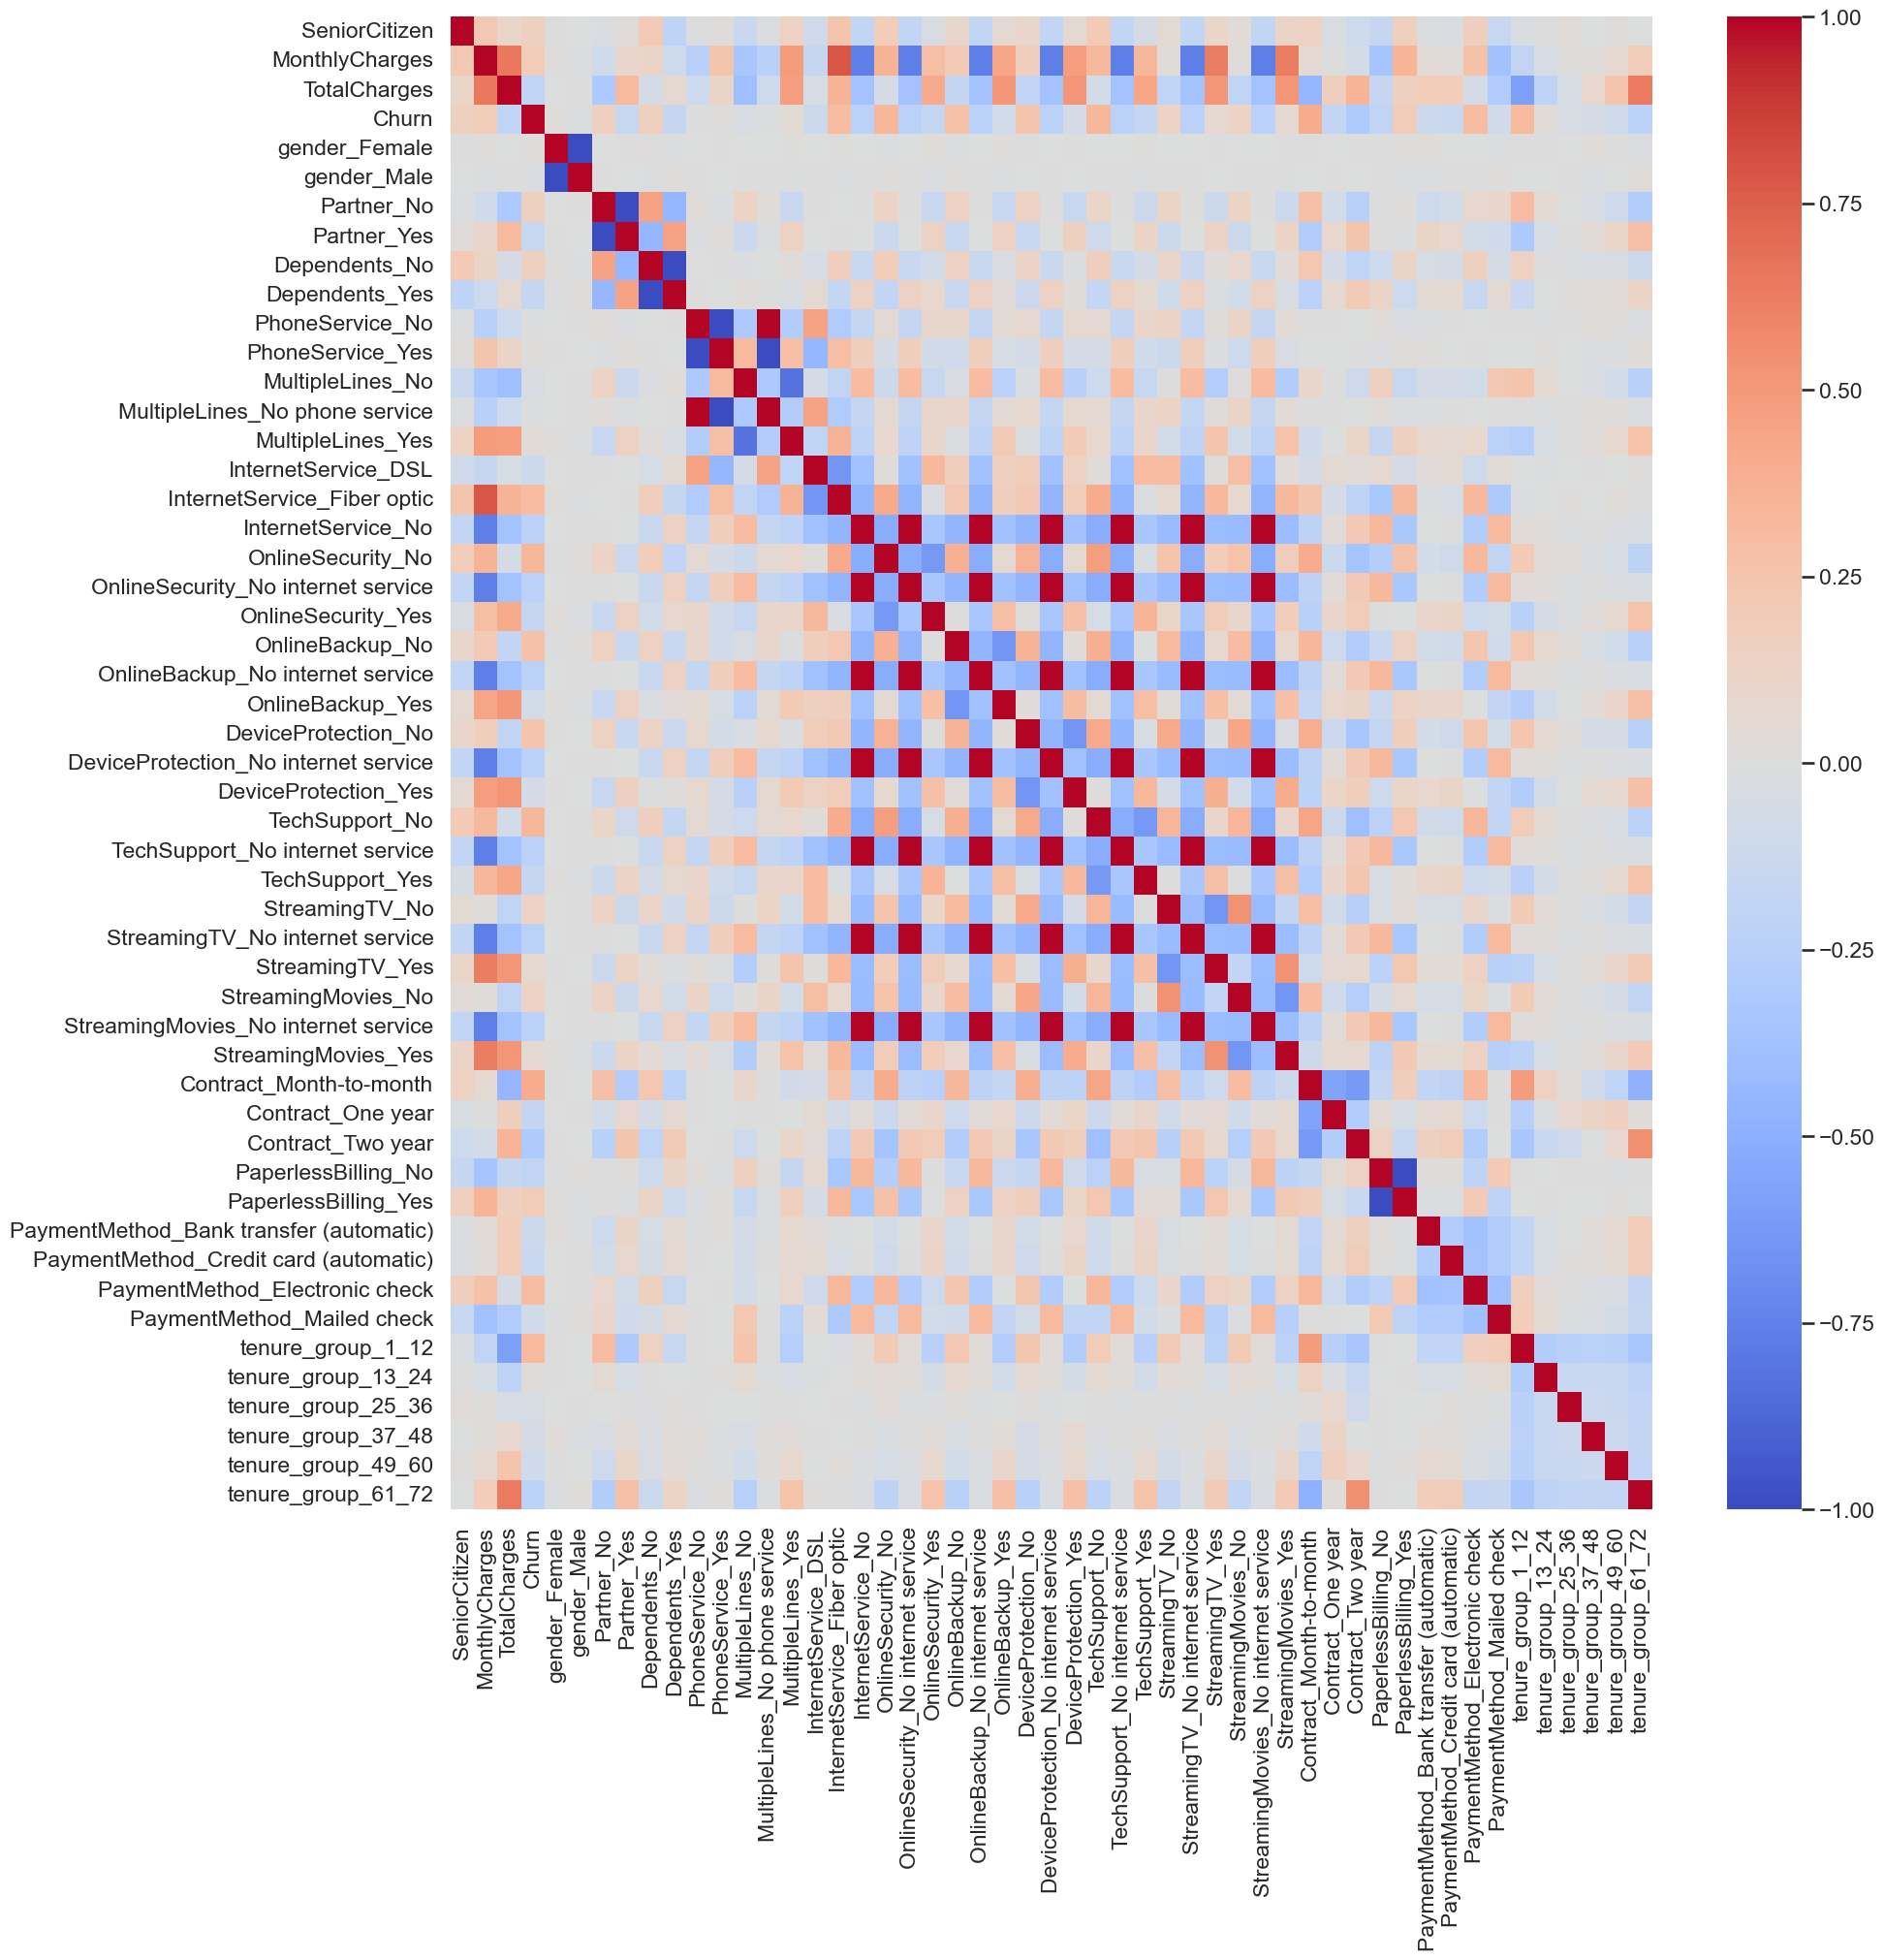

In [312]:
plt.figure(figsize=(20,20))
sns.heatmap(telco_data_dummies.corr(),cmap="coolwarm")

<Axes: >

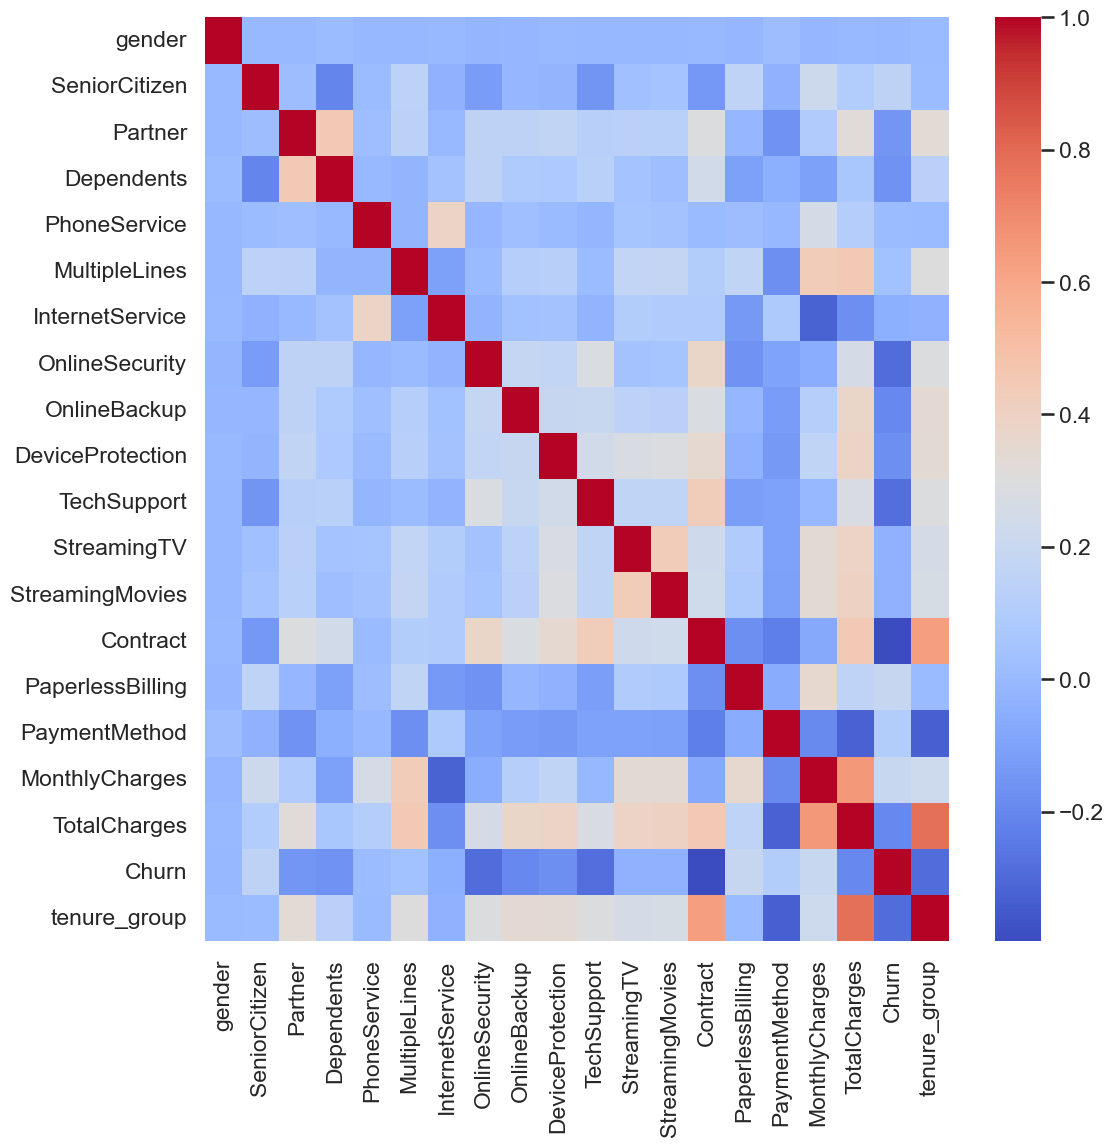

In [313]:
plt.figure(figsize=(12,12))
sns.heatmap(test_lab.corr(),cmap="coolwarm")

# CONCLUSION

These are some of the quick insights from this exercise:

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners


In [314]:
test_lab.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0,1
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0,2
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0,3
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1,1


In [317]:
test_lab.to_csv('tel_churn1.csv')